### Hypothesis Testing

In [1]:
import pandas as pd
import plotnine as p9
import warnings
import sys

from datetime import datetime
from plotnine import *
from pyprojroot import here

sys.path.insert(0, f"{here()}/src")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)
pd.reset_option("mode.chained_assignment")

datem = datetime.today().strftime("%Y-%m-%d")

In [2]:
bhrc = pd.read_csv(f"{here()}/data/processed/2025-01-29_bhrc_all_waves.csv")
#bhrc_test = pd.read_csv(f"{here()}/data/processed/2025-01-29_bhrc_all_waves.csv") 
#forbow = pd.read_csv(f"{here()}/data/processed/frb_brain_age_stats_2024-12-16.csv")
forbow = pd.read_csv(f"{here()}/data/processed/2025-02-06_forbow_brain_age_results.csv")

In [3]:
forbow.shape

(714, 43)

In [4]:
#from plots import scatter_predicted_chronological_amap

#scatter_predicted_chronological_amap(bhrc)

In [5]:
#forbow.rename(columns={'clmdd': 'depression', "clbpd": "bpd", "clanx": "anxiety"}, inplace=True)
#forbow['depression'] = forbow['depression'].map({1.0: 'Yes', 0.0: 'No'})
#forbow['bpd'] = forbow['bpd'].map({1.0: 'Yes', 0.0: 'No'})
#forbow['anxiety'] = forbow['anxiety'].map({1.0: 'Yes', 0.0: 'No'})
bhrc['bpd'] = bhrc['bpd'].map({2.0: 'Yes', 0.0: 'No'})
bhrc['bpd'] = bhrc['bpd'].fillna('No')

In [6]:
ids = bhrc["scan_id"]
#ids_test = bhrc_test["scan_id"]
ls = bhrc[ids.isin(ids[ids.duplicated()])].sort_values("scan_id")
#ls_test = bhrc_test[ids_test.isin(ids_test[ids_test.duplicated()])].sort_values("scan_id")

ids_ = forbow["scan_id"]
ls_forbow = forbow[ids.isin(ids[ids.duplicated()])].sort_values("scan_id")

/var/folders/7w/4mwg2xbx4j9645_p5tvccmph0000gn/T/ipykernel_29544/2368045781.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [7]:
ls1 = ls[['scan_id', 'group', 'scan_age', 'brain_age', 'brain_age_gap', 'sex', 'depression', 'anxiety', 'adhd']]
ls1.sort_values("scan_id", inplace=True)

#ls2 = ls_test[['scan_id', 'group', 'scan_age', 'brain_age', 'brain_age_gap', 'sex', 'depression', 'anxiety', 'adhd']]
#ls2.sort_values("scan_id", inplace=True)

lsf = ls_forbow[['scan_id', 'group', 'chronological_age', 'brain_age', 'brain_age_gap', 'sex', 'depression', 'anxiety', 'adhd']]
lsf.sort_values("scan_id", inplace=True)

/var/folders/7w/4mwg2xbx4j9645_p5tvccmph0000gn/T/ipykernel_29544/816218402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/7w/4mwg2xbx4j9645_p5tvccmph0000gn/T/ipykernel_29544/816218402.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
lsf.head()

,scan_id,group,chronological_age,brain_age,brain_age_gap,sex,depression,anxiety,adhd
549,1,FHR (SMI),22.803559,18.906227,-3.897332,Female,Yes,Yes,Yes
630,1,FHR (SMI),23.819302,18.693384,-5.125918,Female,Yes,Yes,Yes
111,1,FHR (SMI),18.088980,18.184736,0.095756,Female,Yes,Yes,No
0,2,Ctrls,12.774812,16.076008,3.301196,Male,No,No,No
420,3,FHR (SMI),15.485284,14.428452,-1.056833,Male,No,Yes,No


In [9]:
no_repeats = ls1.drop_duplicates(subset=['scan_id'])
no_repeats.groupby(['group'])['brain_age_gap'].mean()

group
Ctrls        1.089984
FHR (SMI)    0.937794
Name: brain_age_gap, dtype: float64

In [10]:
df_sex = forbow.copy()
df_sex.drop_duplicates(subset=['scan_id'], inplace=True)

#df_sex.groupby(['group'], as_index=True).describe()

In [11]:
#df_sex.groupby(['anxiety']).count()

In [12]:
df_sex_b = bhrc.copy()
df_sex_b.drop_duplicates(subset=['scan_id'], inplace=True)

#df_sex_b.groupby(['adhd'], as_index=True).describe()



### Descriptive Stats

|  | BHRC | Forbow 
| :- | -: | :-: 
| *N* scans | 1500 | 673 
| *N* participants (% Female)  | 790 (43.92%) | 274 (50%)  
| Years (Mean +/- std) | 13.59 (3.48) | 15.24 (3.98)  

## Variables of Interest
1. Family History
2. Youth diagnosis - depression, bipolar disorder
3. Developmental psychopathology - Anxiety, ADHD
4. FORBOW Specific: <br>
    4.1. Adversity <br>
    4.2. Functional impairment <br>
    4.3. Antecedents<br>

In [13]:
def create_density_plots(dataframes, name, group_column, value_column, group1, group2):

    plots = []
    median_group = dataframes[dataframes[group_column] == group1][value_column].median()
    median_no_group = dataframes[dataframes[group_column] == group2][value_column].median()

    p = (ggplot(df, aes(x=value_column, color=group_column, fill=group_column)) + 
            geom_density(alpha=0.2) +
            theme_tufte() + 
            labs(x="zBAG", y="Density", color=group_column, fill=group_column, title=name.upper()) +
            scale_color_manual(values=['#2F4F7F', '#FF4500']) +
            scale_fill_manual(values=['#2F4F7F', '#FF4500']) +
            geom_vline(xintercept=median_group, color='#FF4500', linetype="dashed") +
            geom_vline(xintercept=median_no_group, color='#2F4F7F', linetype="dashed"))
        
    #p = p + annotate("text", x=-2, y=0.5, label="FORBOW")

    plots.append(p)

    return plots

dataframes = {'bhrc': bhrc, 'forbow': forbow}

## Family History of SMI 

|  | Controls | FHR |
| :- | -: | :-: | 
| BHRC | 345 | 445 |
| FORBOW | 100 | 174 |


<br></br>

| | β | SE | CI | p | 
| :- | -: | -: | :-: | :-: | 
| BHRC | 0.00 | 0.17 | [-0.34,0.34] | 1.00 |
| FORBOW | 0.07 | 0.28 | [-0.47,0.61] | 0.80 |

In [15]:
bhrc.to_csv(f"{here()}/data/processed/bhrc_sobp_data.csv", index=False)

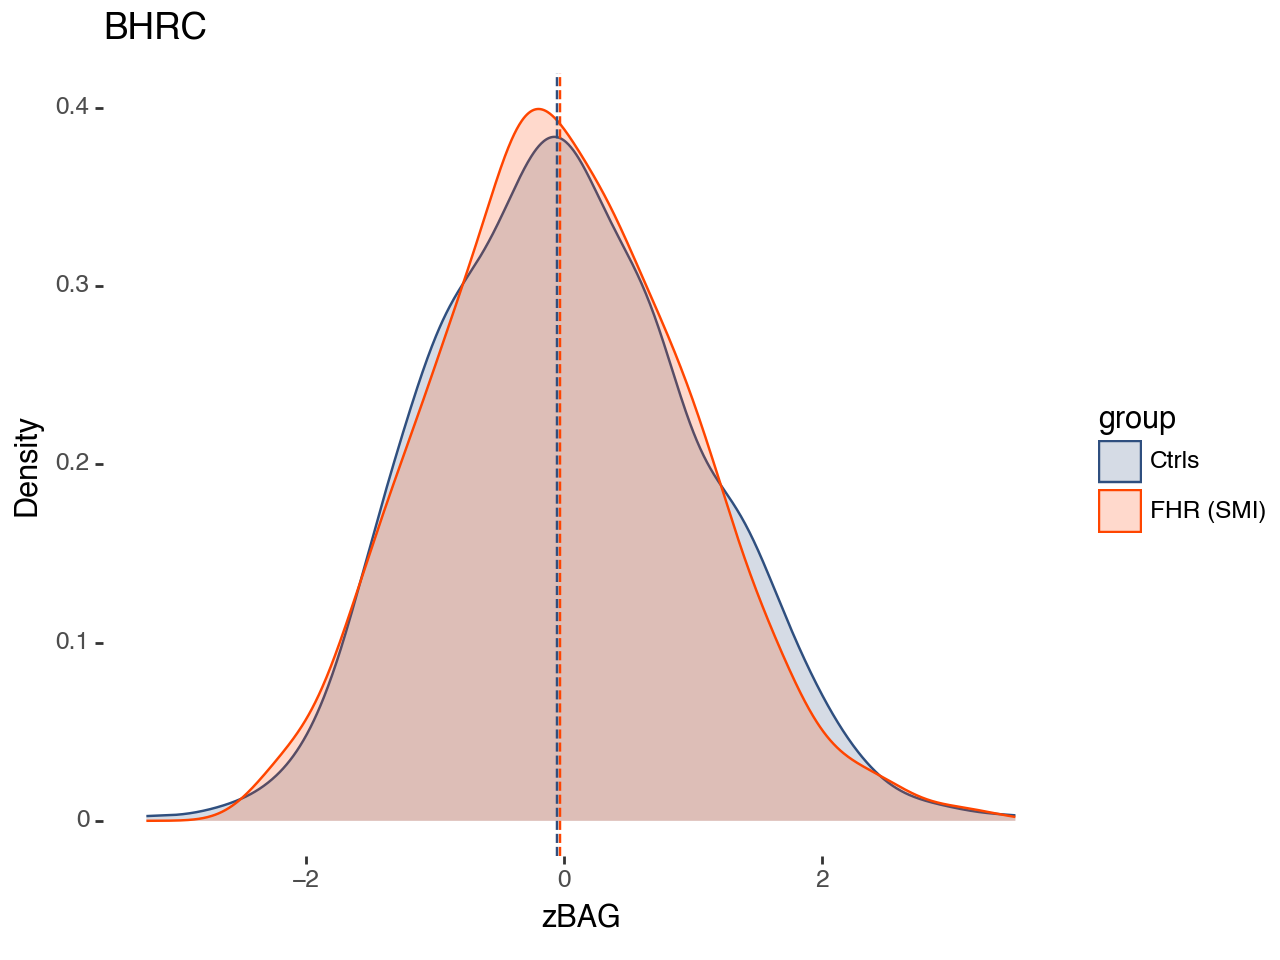

[<Figure Size: (640 x 480)>]


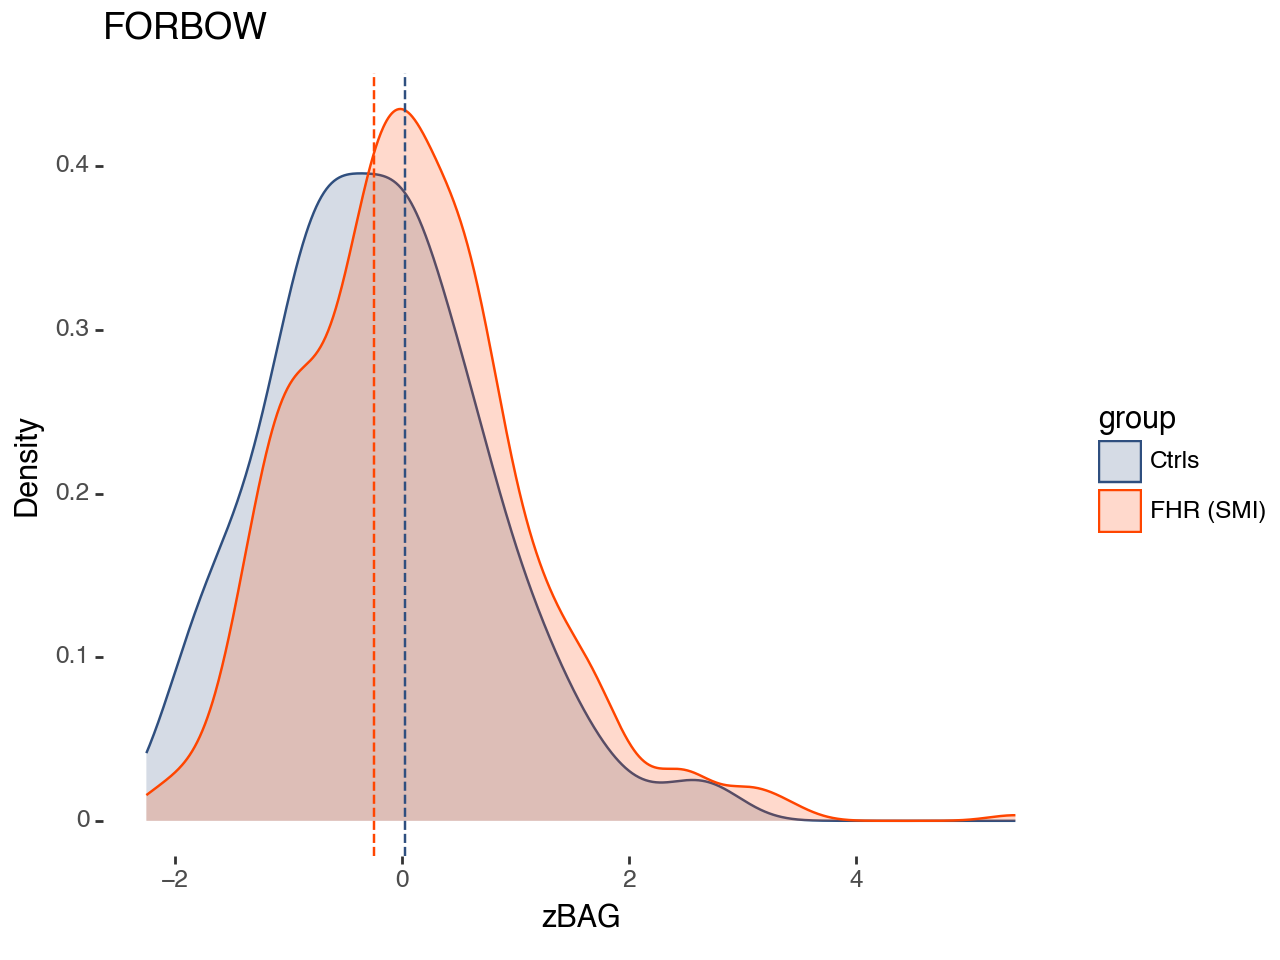

[<Figure Size: (640 x 480)>]


In [14]:
for name, df in dataframes.items():    
    fhr_plots = create_density_plots(df, name, "group", "bag_z_scored", "Ctrls", "FHR (SMI)")
    print(fhr_plots)

## Depression

|  | Depression | No Depression |
| :- | -: | :-: | 
| BHRC | 47 | 743 | 
| FORBOW | 53 | 221 | 


<br></br>

| | β | SE | CI | p | 
| :- | -: | -: | :-: | :-: | 
| BHRC | 0.04 | 0.19 | [-0.34,0.41] | 0.85 |
| FORBOW | 0.00 | 0.27 | [-0.52,0.53] | 1.00 |

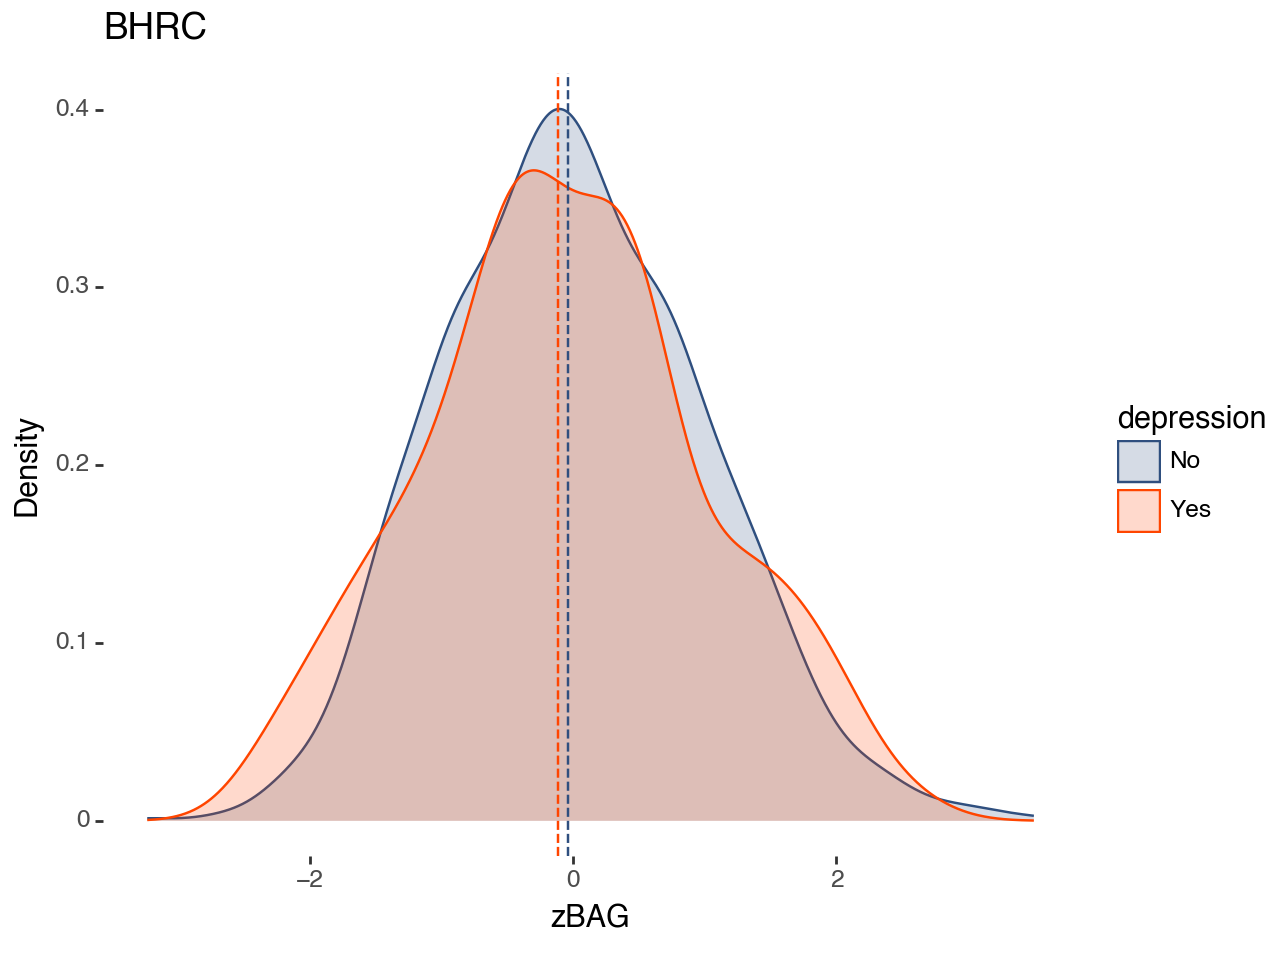

[<Figure Size: (640 x 480)>]


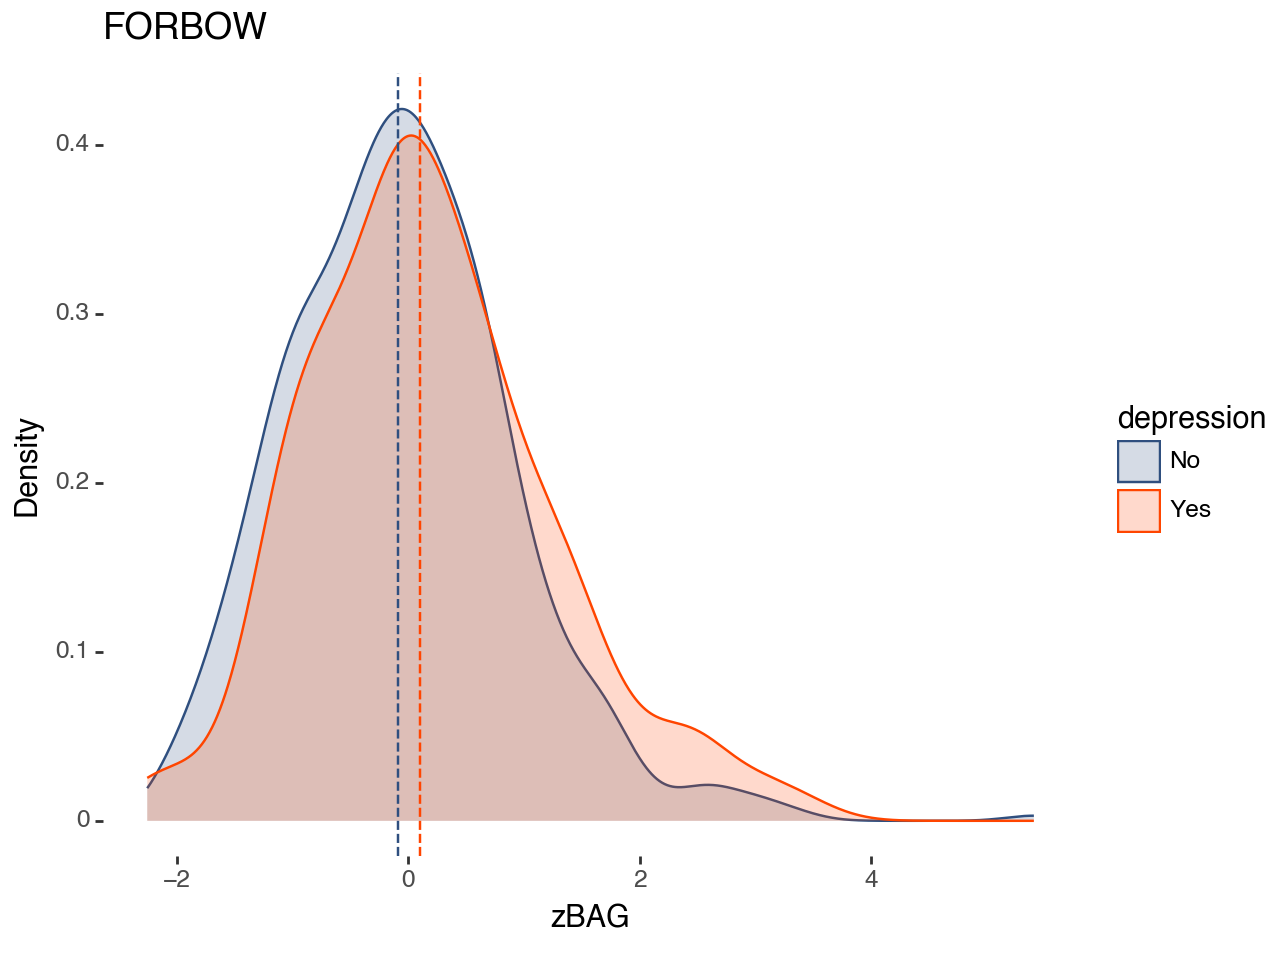

[<Figure Size: (640 x 480)>]


In [20]:
for name, df in dataframes.items():
    fhr_plots = create_density_plots(df, name, "depression", "bag_z_scored", "Yes", "No")
    print(fhr_plots)

## Bipolar Disorder


|  | BD | No BD | 
| :- | -: | :-: | 
| BHRC | 3 | 787 | 
| FORBOW | 4 | 270 |


<br></br>

| | β | SE | CI | p | 
| :- | -: | -: | :-: | :-: | 
| BHRC | -0.52 | 0.57 | [-0.51,0.48] | 0.32 |
| FORBOW | 0.09 | 0.63 | [-1.15,1.34] | 0.88 |

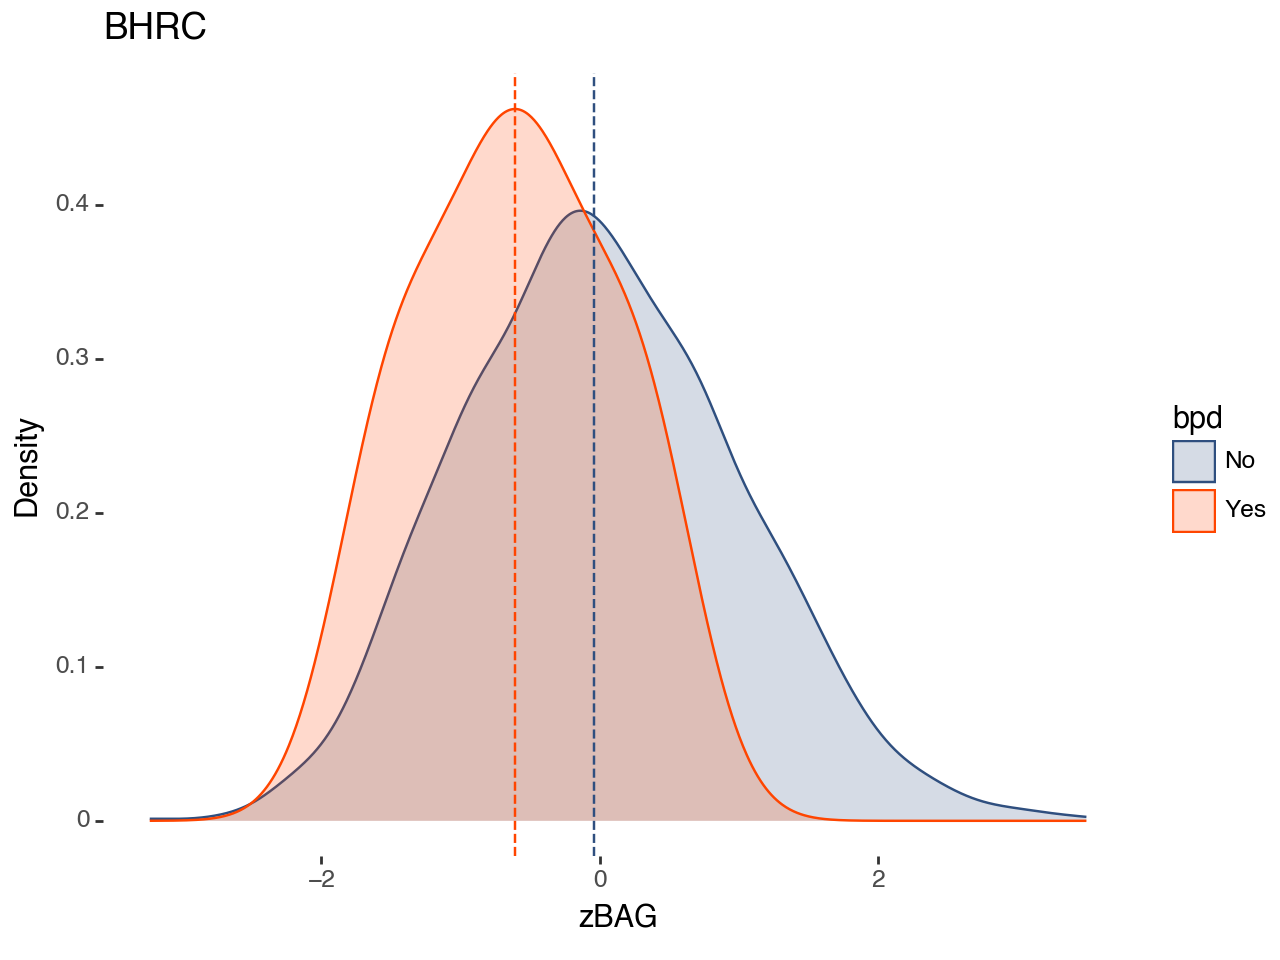

[<Figure Size: (640 x 480)>]


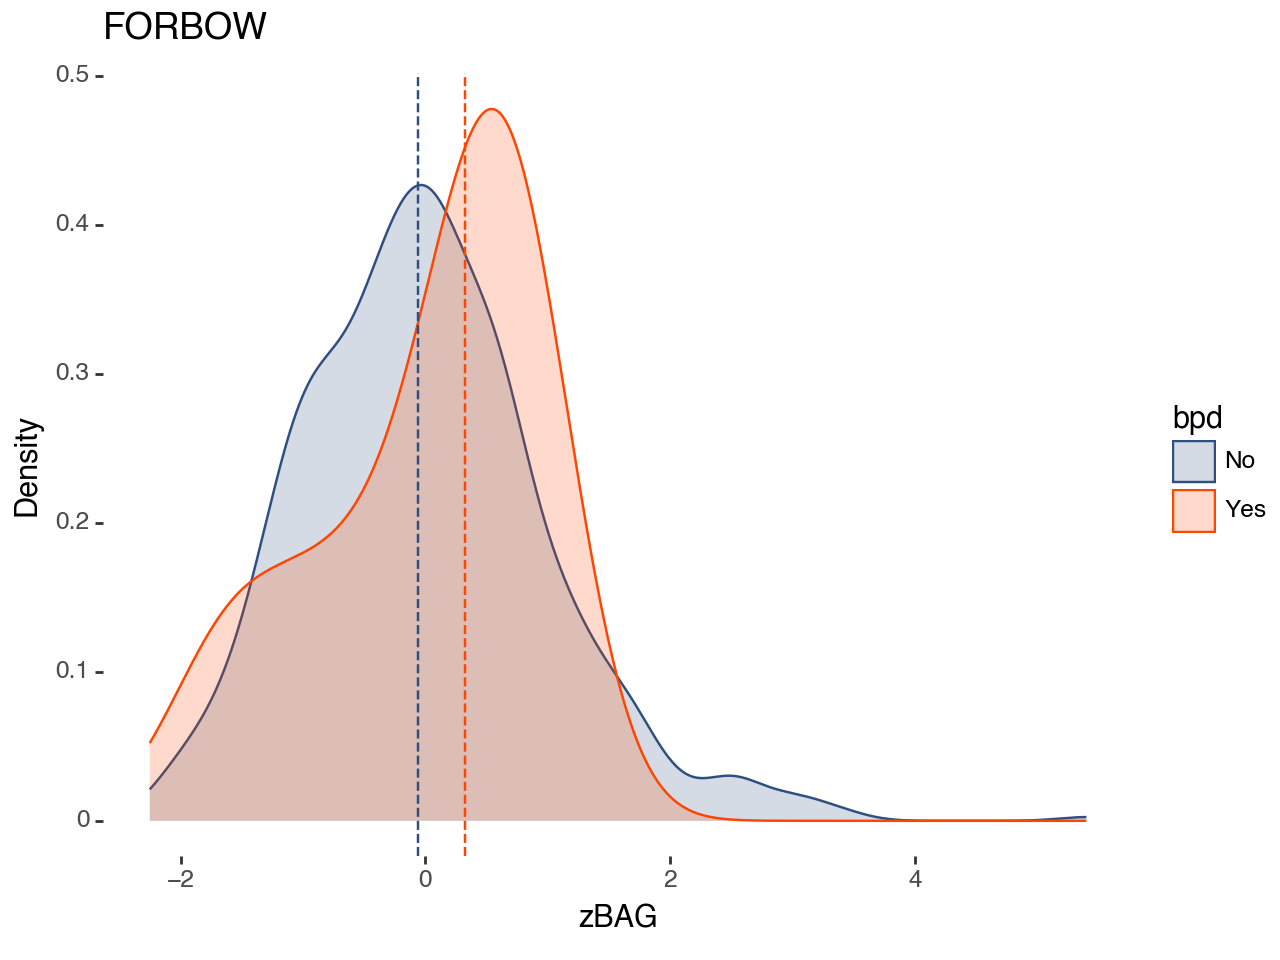

[<Figure Size: (640 x 480)>]


In [21]:
for name, df in dataframes.items(): 
    fhr_plots = create_density_plots(df, name, "bpd", "bag_z_scored", "Yes", "No")
    print(fhr_plots)

## ADHD


|  | ADHD | No ADHD | 
| :- | -: | :-: |
| BHRC | 101 | 689 | 
| FORBOW | 76 | 198 |

<br></br>

| | β | SE | CI | p | 
| :- | -: | -: | :-: | :-: | 
| BHRC | 0.25| 0.19 | [-0.13,0.63] |0.20|
| FORBOW | -0.26 | 0.22 | [-0.68,0.16] | 0.22 |

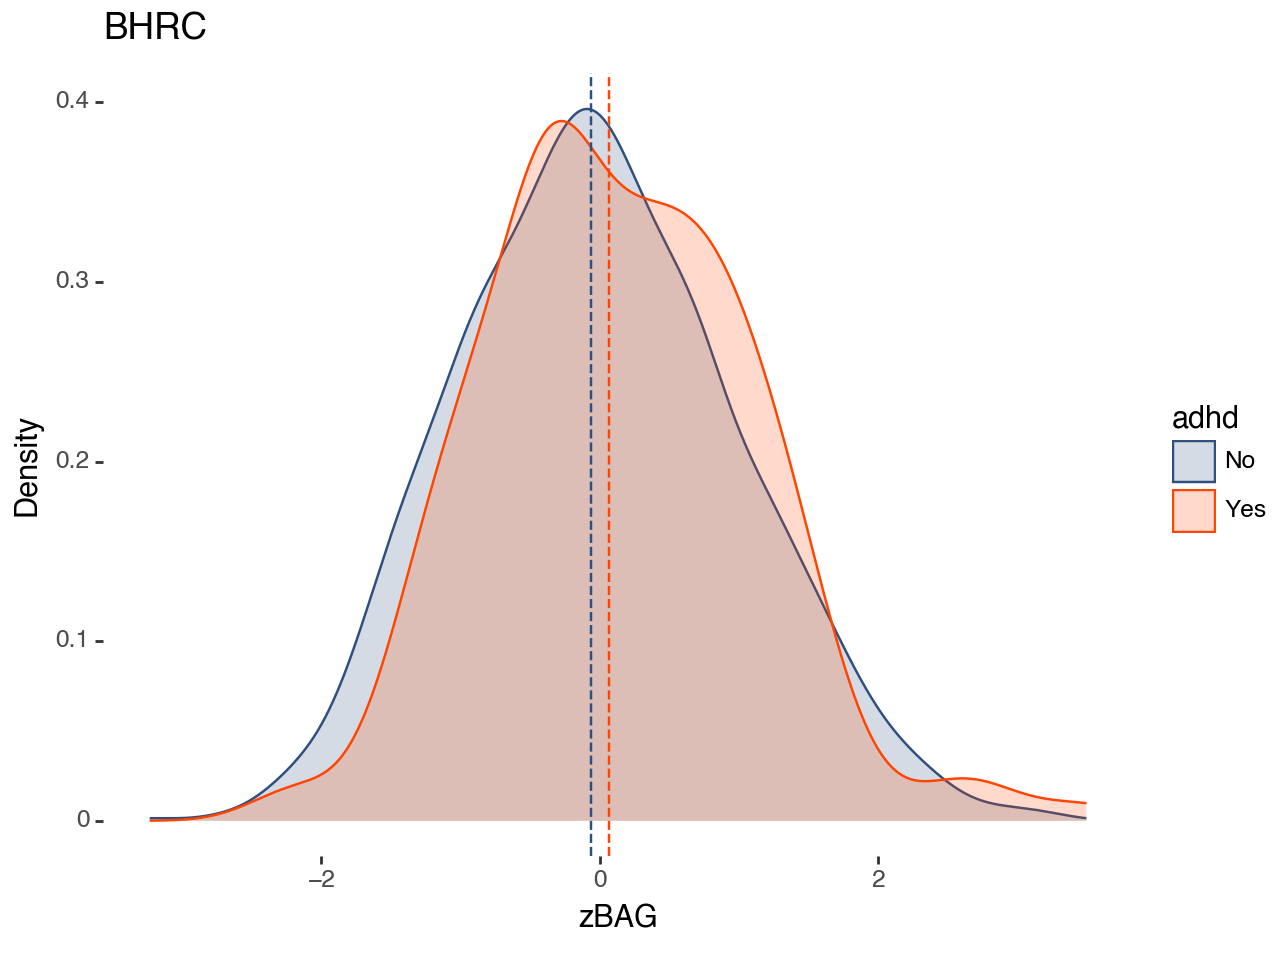

[<Figure Size: (640 x 480)>]


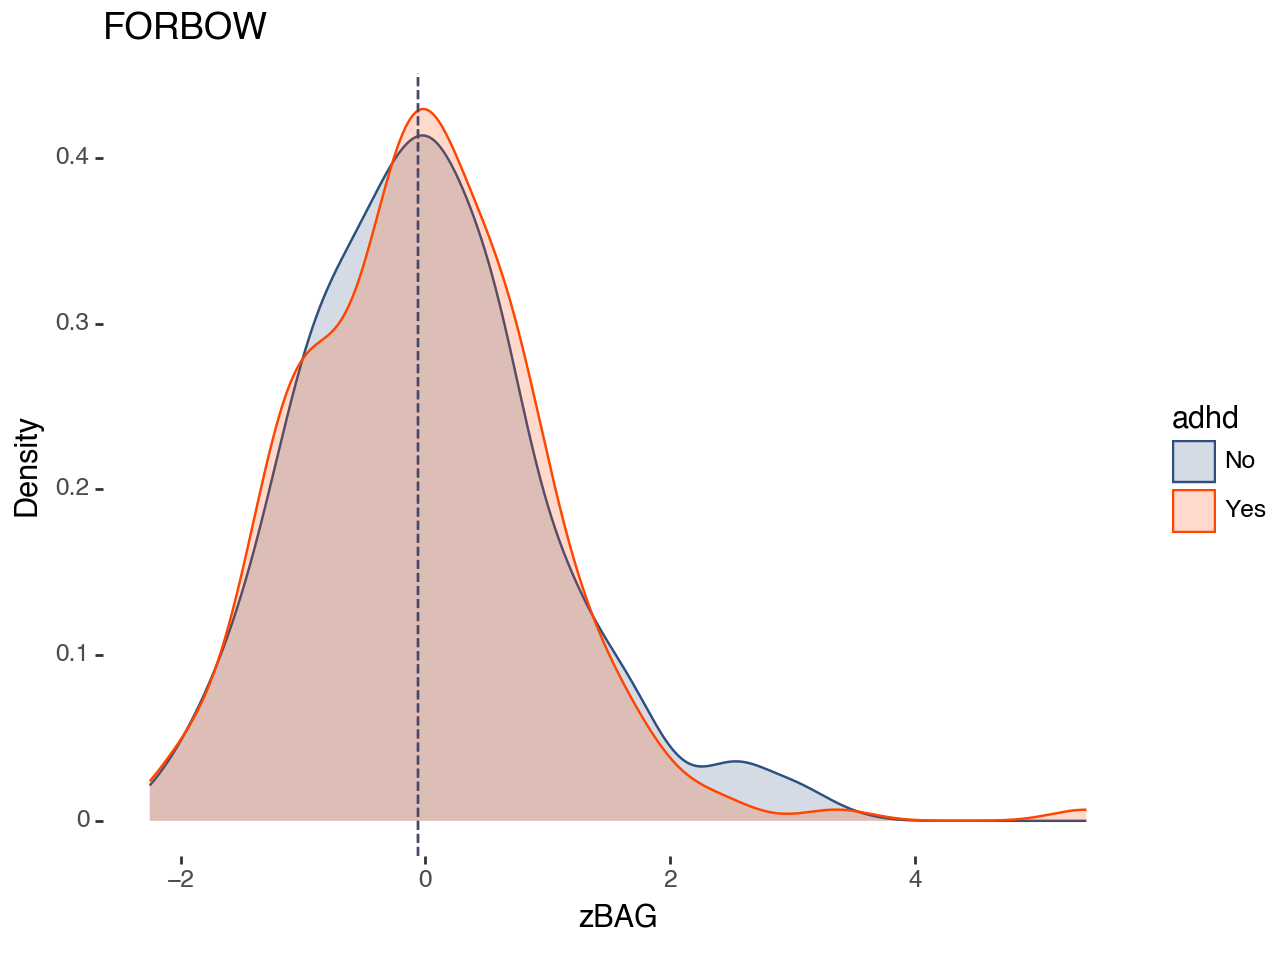

[<Figure Size: (640 x 480)>]


In [22]:
for name, df in dataframes.items():
    fhr_plots = create_density_plots(df, name, "adhd", "bag_z_scored", "Yes", "No")
    print(fhr_plots)

## Anxiety


|  | Anxiety | No Anxiety 
| :- | -: | :-: 
| BHRC | 130 | 660 
| FORBOW | 135 | 138  

<br></br>

| | β | SE | CI | p | 
| :- | -: | -: | :-: | :-: | 
| BHRC | 0.14 | 0.14 | [-0.14,0.43] | 0.32 |
| FORBOW | 0.02 | 0.14 | [-0.04,0.07] | 0.55 |

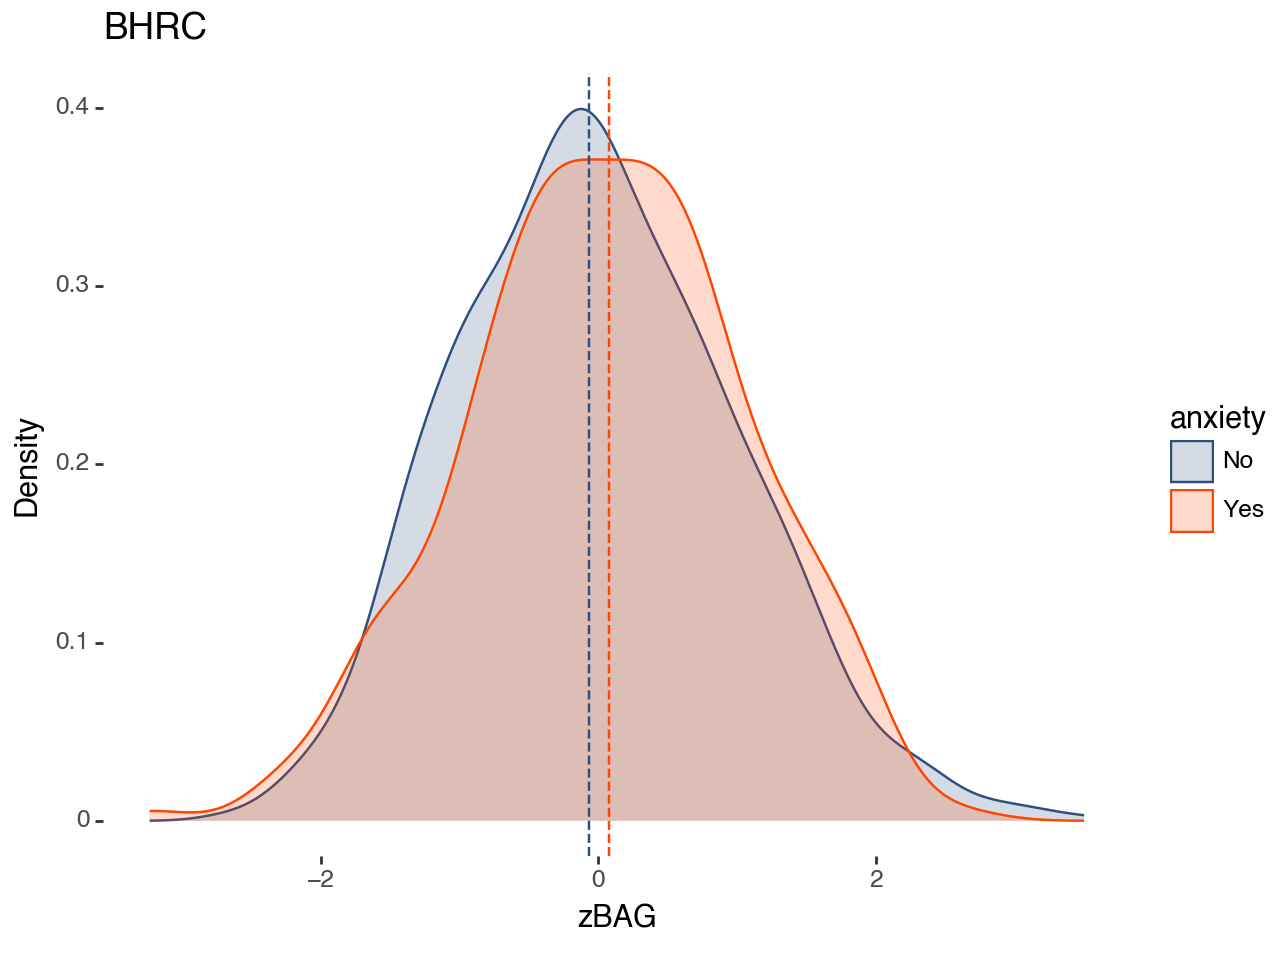

[<Figure Size: (640 x 480)>]


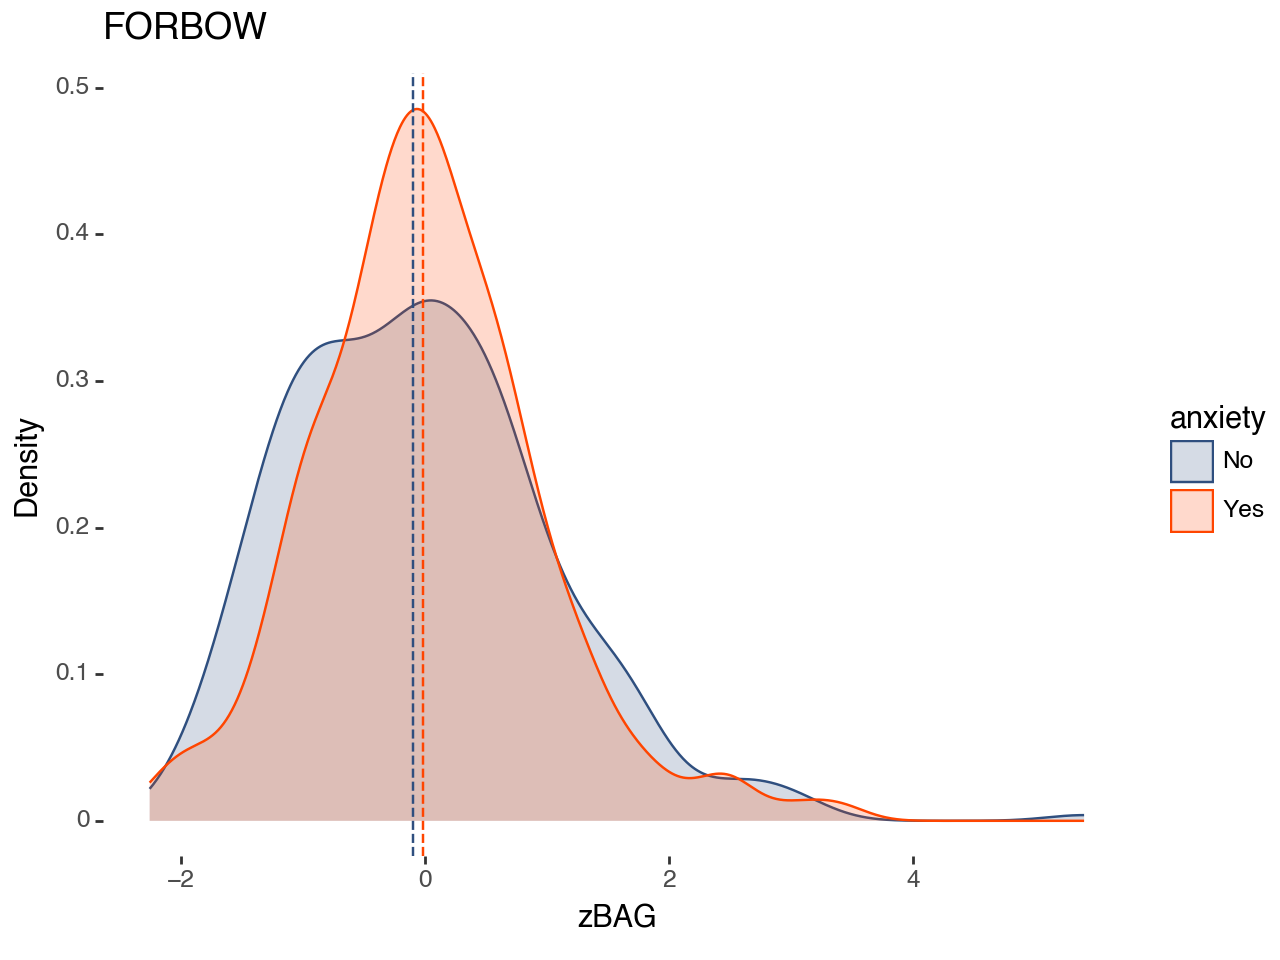

[<Figure Size: (640 x 480)>]


In [23]:
for name, df in dataframes.items():
    fhr_plots = create_density_plots(df, name, "anxiety", "bag_z_scored", "Yes", "No")
    print(fhr_plots)

# FORBOW Specific variables
## Adversity


|  | Adversity | No Adversity 
| :- | -: | :-: 
| FORBOW | 77 | 197  

<br></br>

| | β | SE | CI | p | 
| :- | -: | -: | :-: | :-: | 
| FORBOW | 0.21 | 0.19 | [-0.17, 0.59] | 0.28 |

## Functional Impairment


|  | Impairment | No Impairment 
| :- | -: | :-: 
| FORBOW | 35 | 239  

<br></br>

| | β | SE | CI | p | 
| :- | -: | -: | :-: | :-: | 
| FORBOW | 0.37 | 0.22 | [-0.06, 0.79] | 0.09 |

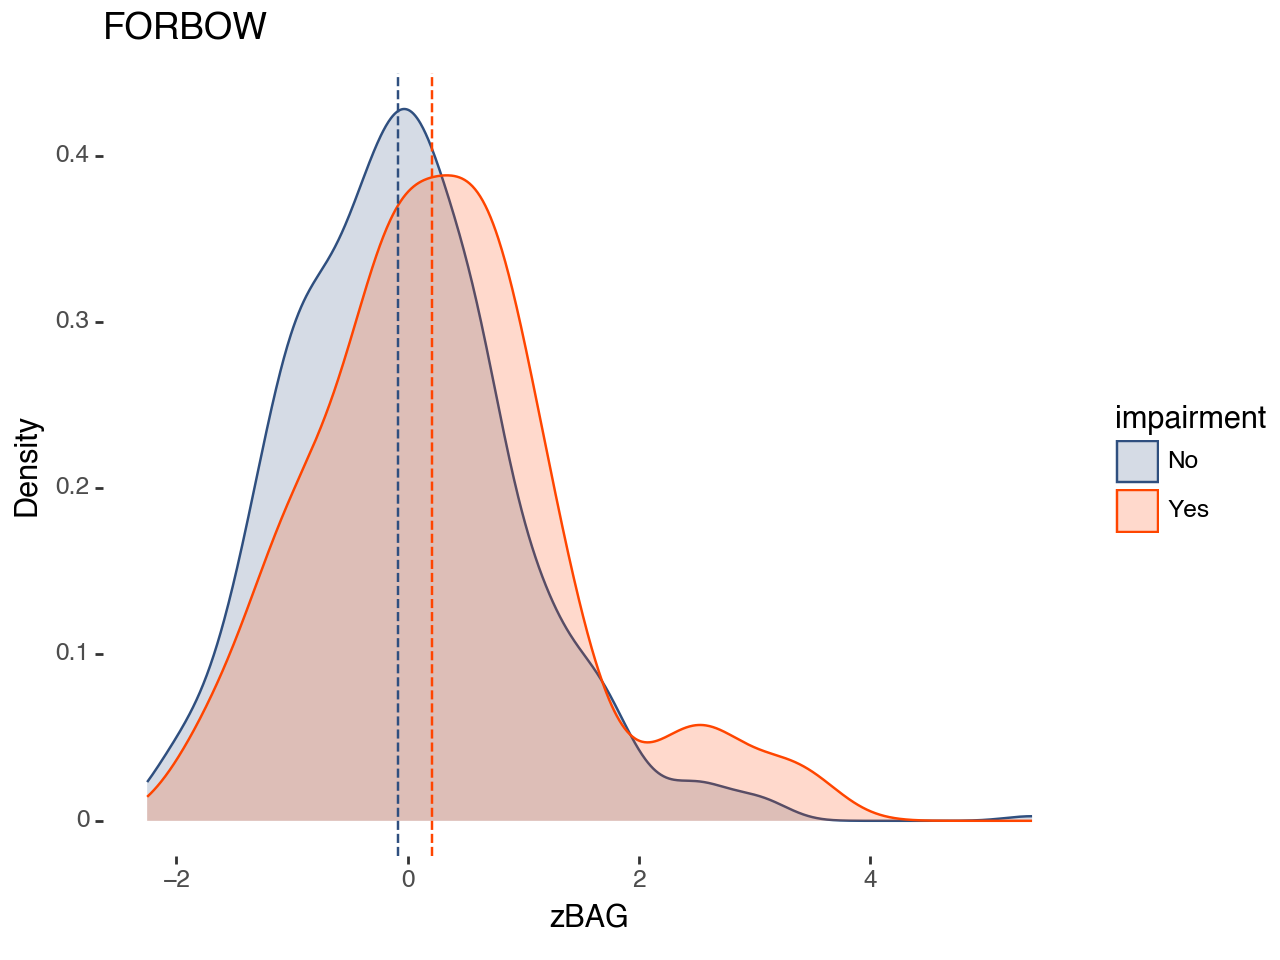

[<Figure Size: (640 x 480)>]


In [25]:
for name, df in dataframes.items():
    fhr_plots = create_density_plots(df, name, "impairment", "bag_z_scored", "Yes", "No")
    print(fhr_plots)

### Antecedents

|  | Antecedents | No Antecedents 
| :- | -: | :-: 
| FORBOW | 30 | 244  

<br></br>

| | β | SE | CI | p | 
| :- | -: | -: | :-: | :-: | 
| FORBOW | -0.20 | 0.25 | [-0.68, 0.28] | 0.41 |

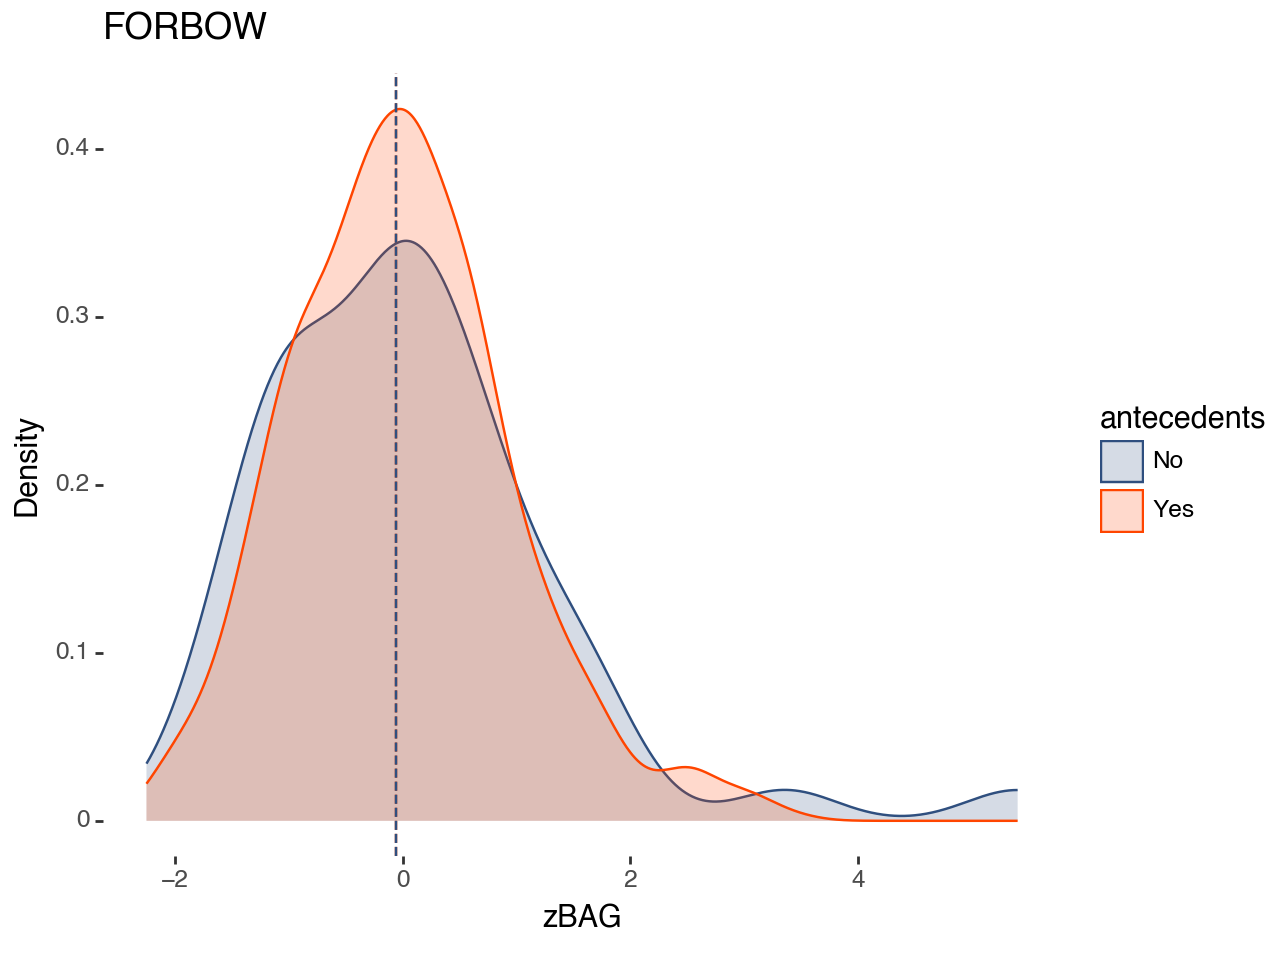

[<Figure Size: (640 x 480)>]


In [26]:
for name, df in dataframes.items():
    fhr_plots = create_density_plots(df, name, "antecedents", "bag_z_scored", "Yes", "No")
    print(fhr_plots)

In [31]:
forbow.shape

(714, 43)